In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Chintan Vajani\Downloads\iris.csv.csv')

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['variety'].value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [9]:
df.isnull().apply(pd.value_counts).T

,False
sepal.length,150
sepal.width,150
petal.length,150
petal.width,150
variety,150


In [10]:
corr = df.corr()

In [11]:
corr*100

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,100.000000,-11.756978,87.175378,81.794113
sepal.width,-11.756978,100.000000,-42.844010,-36.612593
petal.length,87.175378,-42.844010,100.000000,96.286543
petal.width,81.794113,-36.612593,96.286543,100.000000


In [31]:
#Data Define - Independent Variable
X = df.drop('variety',axis=1)

In [32]:
y = df[['variety']]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 1)
(45, 1)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model = KNeighborsClassifier(n_neighbors=3)

In [19]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

In [22]:
#Performance measures only for classification algorithm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
accuracy_score(y_test,y_pred)*100

97.77777777777777

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.95      1.00      0.97        18
   Virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [25]:
cf = confusion_matrix(y_test,y_pred)

In [26]:
cf

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

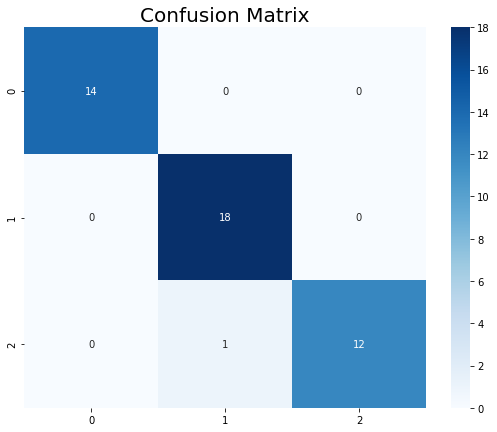

In [28]:
plt.figure(figsize=(9,7))
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
plt.show()